## Importing Libraries 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


In [20]:
data = pd.read_csv(r"F:\Course Resources\Sem 3\DAI - 101 - Data Science\Assignment 2\DAI-101-Assignment--2-\penguins.csv")
print("First five rows of the dataset:")
display(data.head())
print("\nMissing values per column:")
print(data.isnull().sum())
print("\nSummary statistics of the dataset:")
display(data.describe())


First five rows of the dataset:


,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007



Missing values per column:
id                    0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Summary statistics of the dataset:


,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,171.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,0.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,85.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,171.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,257.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,343.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


## Handling Missing Values 

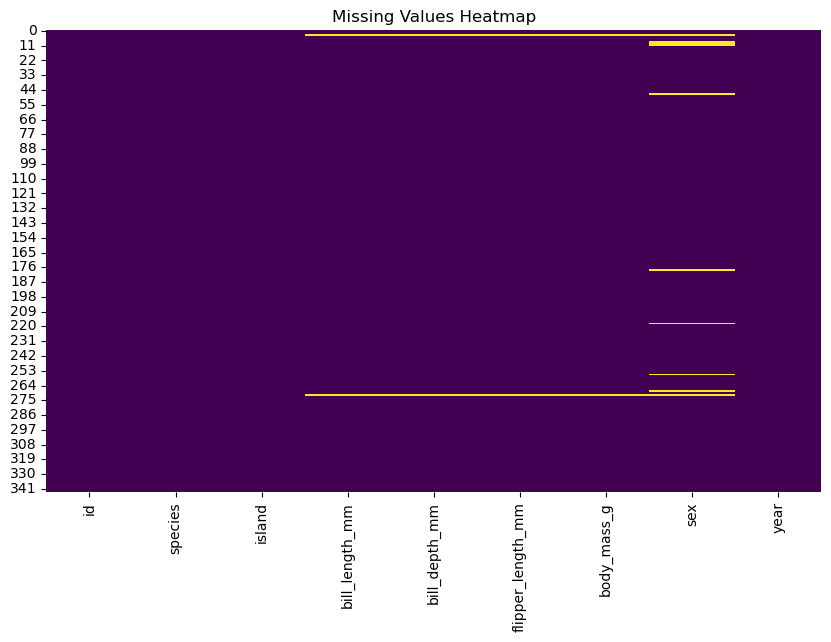


Missing values after handling:
id                   0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

data['bill_length_mm'] = data['bill_length_mm'].fillna(data['bill_length_mm'].median())
data['bill_depth_mm'] = data['bill_depth_mm'].fillna(data['bill_depth_mm'].median())
data['flipper_length_mm'] = data['flipper_length_mm'].fillna(data['flipper_length_mm'].median())
data['body_mass_g'] = data['body_mass_g'].fillna(data['body_mass_g'].median())
data['sex'] = data['sex'].fillna(data['sex'].mode()[0])


print("\nMissing values after handling:")
print(data.isnull().sum())


## Exploratory Data Analysis ( EDA ) :


C:\Users\Sanchita Gupta\AppData\Local\Temp\ipykernel_19728\2705013237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=data, palette='viridis')


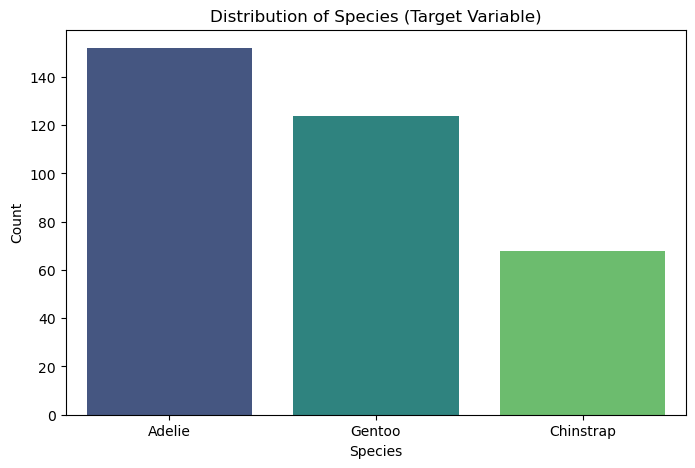

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x='species', data=data, palette='viridis')
plt.title('Distribution of Species (Target Variable)')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


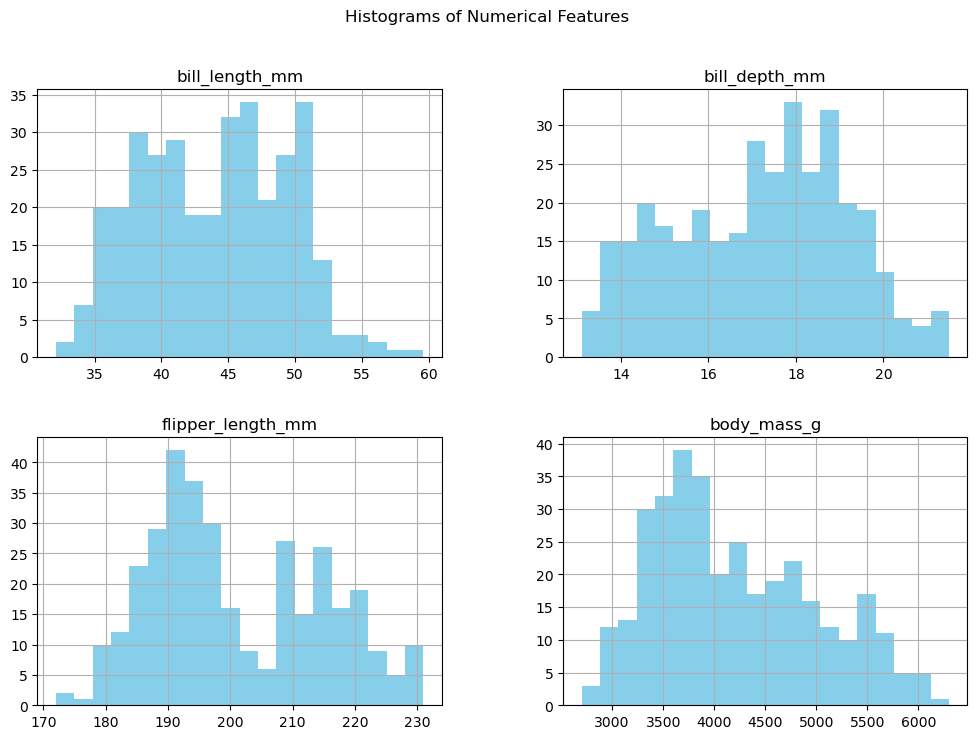

C:\Users\Sanchita Gupta\AppData\Local\Temp\ipykernel_19728\3113391782.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=data, palette='viridis')
C:\Users\Sanchita Gupta\AppData\Local\Temp\ipykernel_19728\3113391782.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=data, palette='viridis')
C:\Users\Sanchita Gupta\AppData\Local\Temp\ipykernel_19728\3113391782.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=data, palette='viridis')
C:\Users\Sanchita G

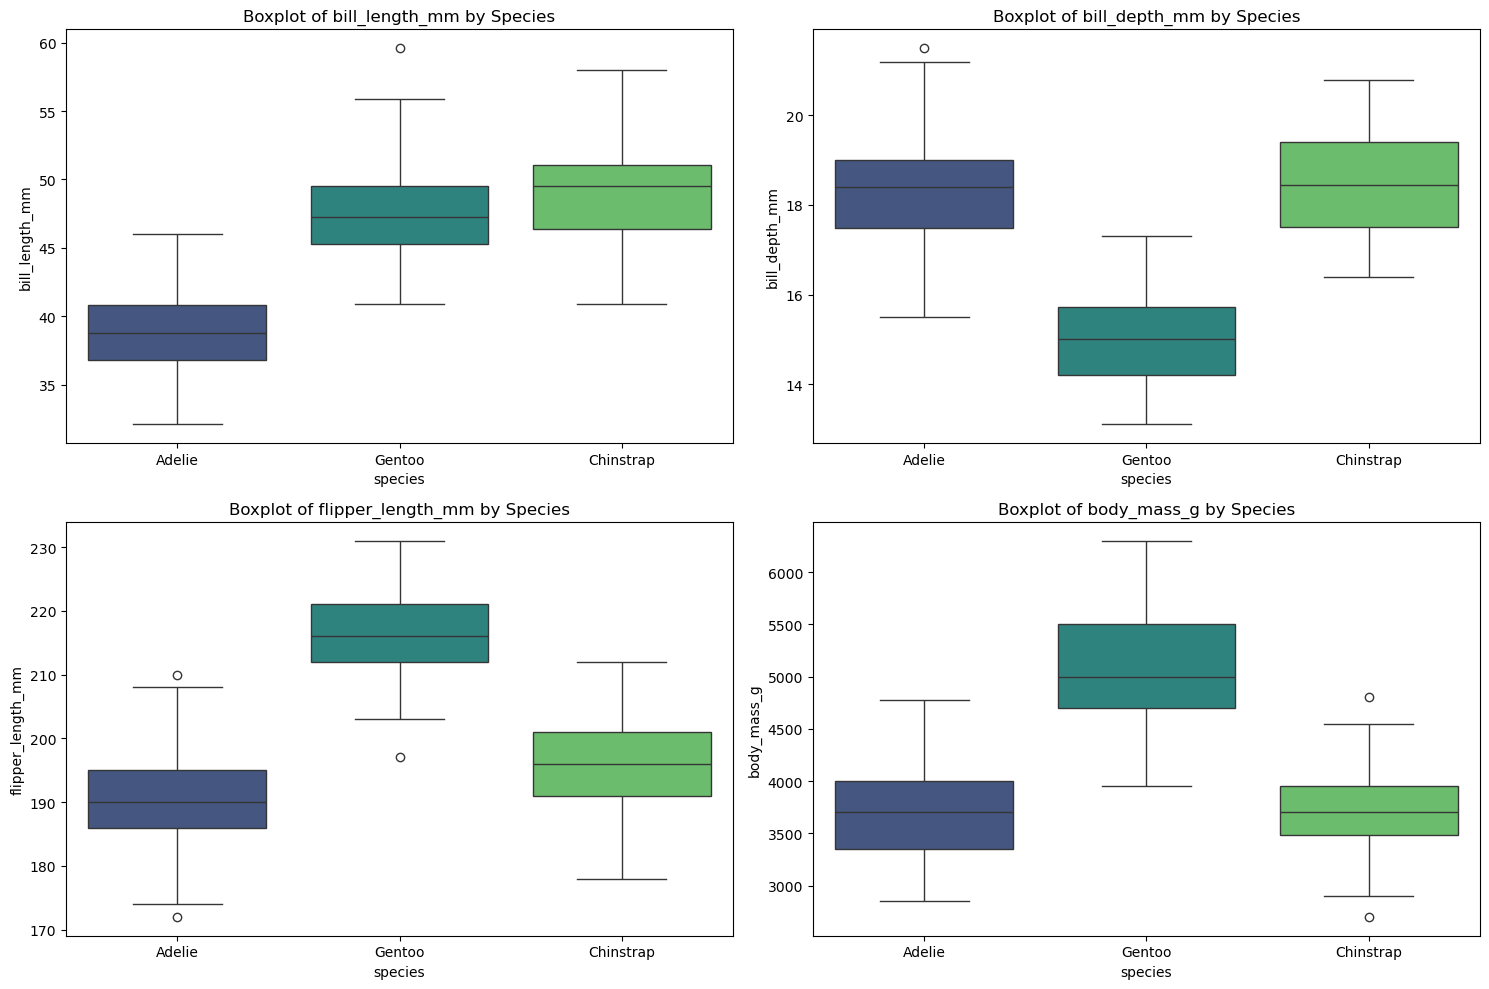

In [25]:
data.hist(column=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], bins=20, figsize=(12, 8), color='skyblue')
plt.suptitle('Histograms of Numerical Features')
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=feature, data=data, palette='viridis')
    plt.title(f'Boxplot of {feature} by Species')
plt.tight_layout()
plt.show()


## Addressing Class Imbalance with SMOTE

In [27]:
print("\nClass distribution before handling imbalance:")
print(Counter(data['species']))

data_encoded = pd.get_dummies(data, columns=['island', 'sex'], drop_first=True)

X = data_encoded.drop(['id', 'species'], axis=1)
y = data_encoded['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:")
print(Counter(y_train_smote))



Class distribution before handling imbalance:
Counter({'Adelie': 152, 'Gentoo': 124, 'Chinstrap': 68})

Class distribution after SMOTE:
Counter({'Adelie': 120, 'Gentoo': 120, 'Chinstrap': 120})


## Model Training and Evaluation 

## 1. Support Vector Machine (SVM)

In [30]:
svm_model = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))
svm_model.fit(X_train_smote, label_binarize(y_train_smote, classes=y.unique()))

y_pred_svm = svm_model.predict(X_test)
y_pred_svm_labels = np.argmax(y_pred_svm, axis=1)
y_test_binarized = label_binarize(y_test, classes=y.unique())
y_test_labels = np.argmax(y_test_binarized, axis=1)

print("\nSVM Classification Report:")
print(classification_report(y_test_labels, y_pred_svm_labels))
print("SVM Accuracy Score:", accuracy_score(y_test_labels, y_pred_svm_labels))

# ROC-AUC score for SVM
svm_auc_score = roc_auc_score(y_test_binarized, y_pred_svm, average="macro")
print("SVM ROC-AUC Score:", svm_auc_score)



SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        13

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

SVM Accuracy Score: 1.0
SVM ROC-AUC Score: 0.9866071428571428


## 2. K-Nearest Neighbors (KNN)

In [32]:
knn_model = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
knn_model.fit(X_train_smote, label_binarize(y_train_smote, classes=y.unique()))

y_pred_knn = knn_model.predict(X_test)
y_pred_knn_labels = np.argmax(y_pred_knn, axis=1)

print("\nKNN Classification Report:")
print(classification_report(y_test_labels, y_pred_knn_labels))
print("KNN Accuracy Score:", accuracy_score(y_test_labels, y_pred_knn_labels))

knn_auc_score = roc_auc_score(y_test_binarized, y_pred_knn, average="macro")
print("KNN ROC-AUC Score:", knn_auc_score)



KNN Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.62      0.66        32
           1       0.83      0.83      0.83        24
           2       0.50      0.62      0.55        13

    accuracy                           0.70        69
   macro avg       0.67      0.69      0.68        69
weighted avg       0.70      0.70      0.70        69

KNN Accuracy Score: 0.6956521739130435
KNN ROC-AUC Score: 0.7747599591349591


## Confusion Matrices

<Figure size 800x600 with 0 Axes>

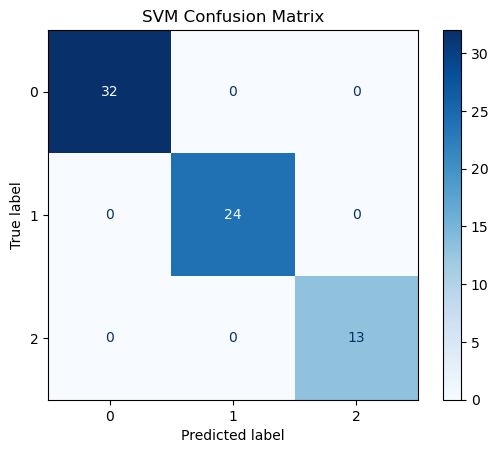

<Figure size 800x600 with 0 Axes>

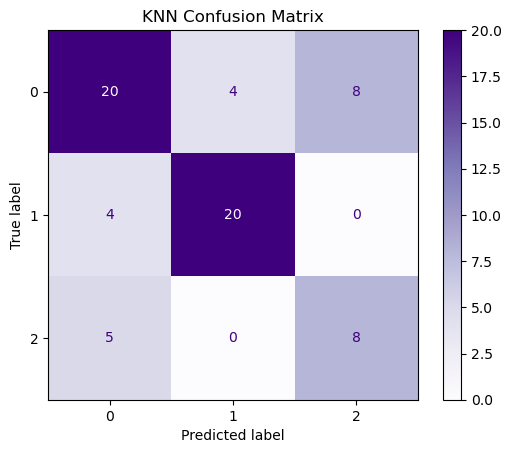

In [34]:
# SVM Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred_svm_labels, cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()
# KNN Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred_knn_labels, cmap='Purples')
plt.title("KNN Confusion Matrix")
plt.show()


## ROC Curves for Both Models

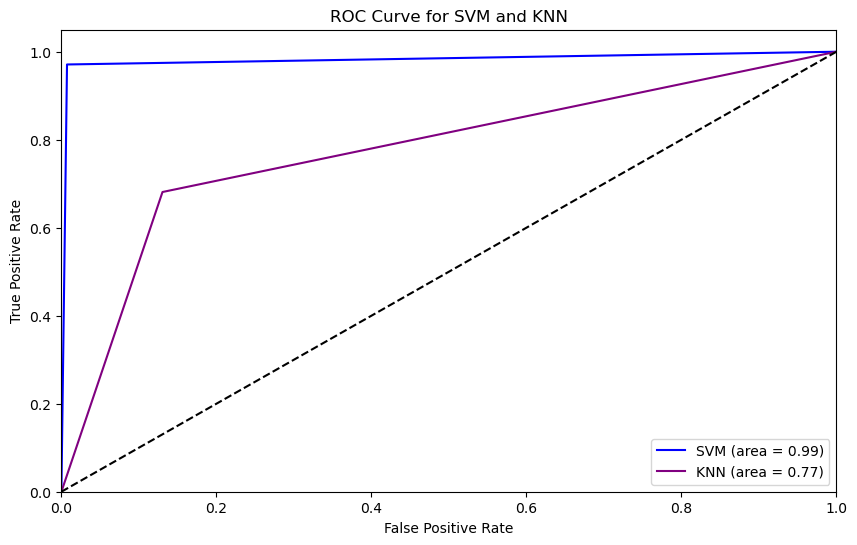

In [36]:
plt.figure(figsize=(10, 6))

fpr_svm, tpr_svm, _ = roc_curve(y_test_binarized.ravel(), y_pred_svm.ravel())
plt.plot(fpr_svm, tpr_svm, color='blue', label='SVM (area = {:.2f})'.format(svm_auc_score))

fpr_knn, tpr_knn, _ = roc_curve(y_test_binarized.ravel(), y_pred_knn.ravel())
plt.plot(fpr_knn, tpr_knn, color='purple', label='KNN (area = {:.2f})'.format(knn_auc_score))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM and KNN')
plt.legend(loc="lower right")
plt.show()
